In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import streamlit as st
import datetime as dt

In [2]:
start = '2014-01-01'
end = dt.datetime.today()
crypto = 'ETH-USD'

data = yf.download(crypto, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
...,...,...,...,...,...,...,...
2446,2024-07-21,3519.426514,3546.619141,3415.443848,3536.605469,3536.605469,13845913681
2447,2024-07-22,3536.627197,3560.075439,3425.795654,3440.419922,3440.419922,18723199034
2448,2024-07-23,3440.768311,3539.531738,3395.420898,3481.995850,3481.995850,24468405650
2449,2024-07-24,3482.151855,3487.653076,3304.039307,3336.339355,3336.339355,16040945448


In [5]:
ma_100_days = data.Close.rolling(100).mean()

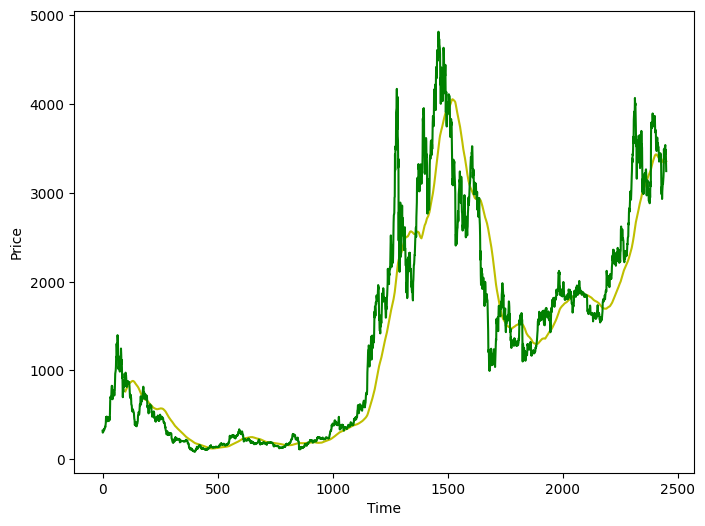

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'y', label= 'mova_100_days')
plt.plot(data.Close, 'g', label= 'Original data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

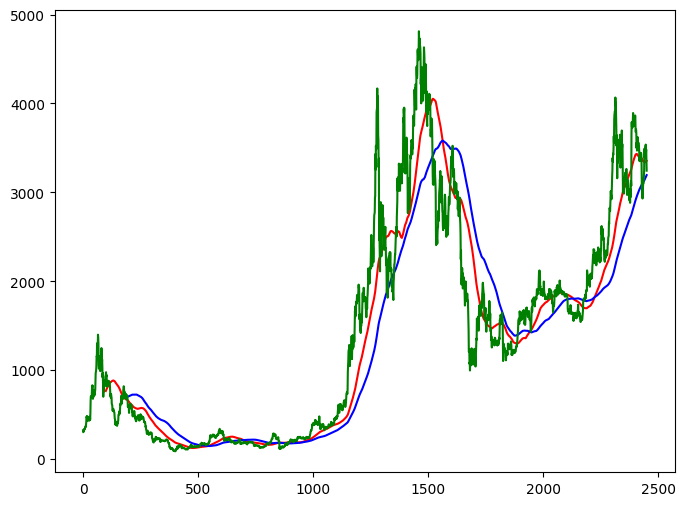

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r', label= 'movingaverage100')
plt.plot(ma_200_days,'b', label= 'movingaverage200')
plt.plot(data.Close,'g', label= 'Original')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

1960

In [12]:
data_test.shape[0]

491

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [16]:
x, y = np.array(x), np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [19]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50

59/59 [==============================] - 29s 304ms/step - loss: 0.0267
Epoch 2/50
59/59 [==============================] - 24s 401ms/step - loss: 0.0073
Epoch 3/50
59/59 [==============================] - 18s 309ms/step - loss: 0.0067
Epoch 4/50
59/59 [==============================] - 18s 310ms/step - loss: 0.0064
Epoch 5/50
59/59 [==============================] - 18s 313ms/step - loss: 0.0052
Epoch 6/50
59/59 [==============================] - 18s 310ms/step - loss: 0.0052
Epoch 7/50
59/59 [==============================] - 19s 319ms/step - loss: 0.0050
Epoch 8/50
59/59 [==============================] - 19s 324ms/step - loss: 0.0052
Epoch 9/50
59/59 [==============================] - 19s 322ms/step - loss: 0.0047
Epoch 10/50
59/59 [==============================] - 18s 302ms/step - loss: 0.0049
Epoch 11/50
59/59 [==============================] - 19s 328ms/step - loss: 0.0043
Epoch 12/50
59/59 [==============================] - 19s 322ms/step - loss: 0.0040
Epoch 13/50


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
pas_100_days = data_train.tail(100)

In [23]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [24]:
data_test_scale  =  scaler.fit_transform(data_test)

In [25]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [26]:
y_predict = model.predict(x)

16/16 [==============================] - 3s 105ms/step


In [27]:
scale =1/scaler.scale_

In [28]:
y_predict = y_predict*scale

In [29]:
y = y*scale

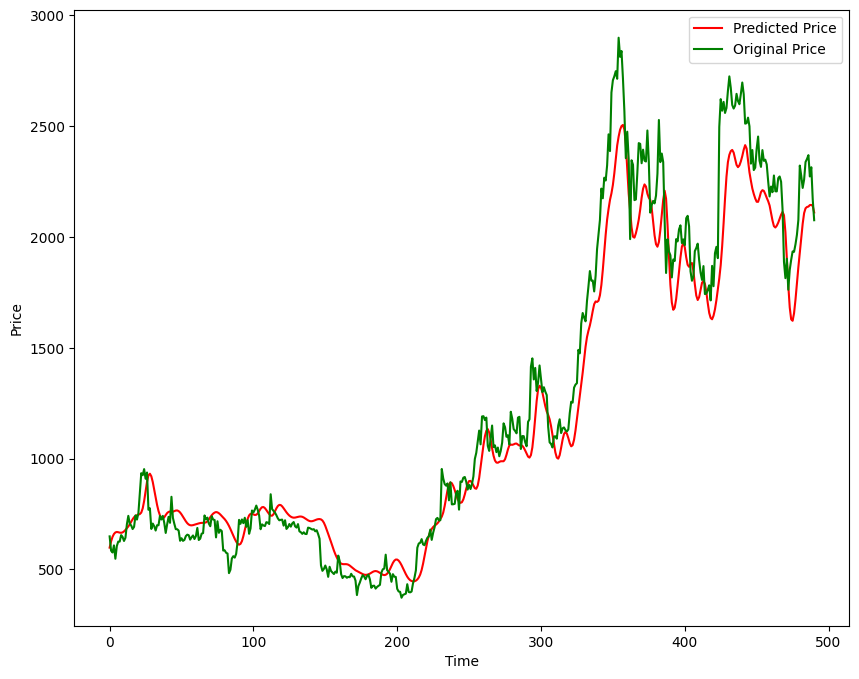

In [30]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
real_data=[data_test_scale[len(data_test_scale)-100:len(data_test_scale+1)]]
real_data=np.array(real_data)
real_data=np.reshape(real_data,(real_data.shape[0],real_data.shape[1],1))

prediction=model.predict(real_data)
prediction=scaler.inverse_transform(prediction)
st.write('Next-Day Forecasting')

with st.container():
    col_111, col_222, col_333 = st.columns(3)
    col_111.metric(f'Closing Price Prediction of the next trading day is',
                   f' $ {str(round(float(prediction), 2))}')

1/1 [==============================] - 0s 88ms/step


2024-07-26 08:58:57.391 
  command:

    streamlit run C:\Users\alokt\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
C:\Users\alokt\AppData\Local\Temp\ipykernel_26208\2743749366.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  f' $ {str(round(float(prediction), 2))}')


In [32]:
model.save('Cryptocurrency price Predictions Model.keras')